<a href="https://colab.research.google.com/github/telez371/360RENT_autotest/blob/main/dl_image_dataset_loading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка собственного набора изображений в TensorFlow


Не забудьте подключить GPU для ускорения обучения нейронной сети 


## Набор данных


**Количество классов в наборе данных**: 4. 


**Размеры изображений**: 150х400. 

**Формат изображений**: jpg.


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline 

## Загружаем данные

## Создаем Tensorflow Dataset'ы 

In [ ]:
batch_size=256
image_size=(150, 400)

**Набор данных для обучения**

In [ ]:
train_dataset = image_dataset_from_directory('/content/sample_data/Data_set',
                                             subset='training',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 90 files belonging to 4 classes.
Using 81 files for training.


**Проверочный набор данных**

In [ ]:
validation_dataset = image_dataset_from_directory('/content/sample_data/Data_set',
                                             subset='validation',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 90 files belonging to 4 classes.
Using 9 files for validation.


Названия классов в наборах данных.

In [ ]:
class_names = train_dataset.class_names
class_names

['.ipynb_checkpoints', 'Name', 'Others', 'registration']

**Примеры изображений**

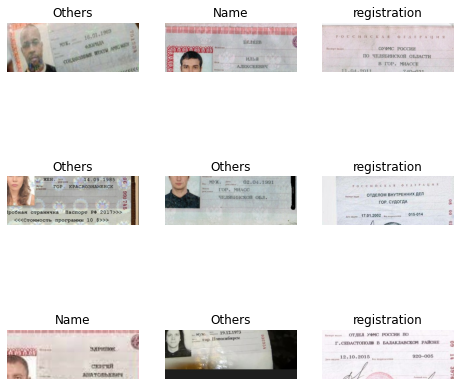

In [ ]:
plt.figure(figsize=(8, 8))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**Набор данных для тестирования**

In [ ]:
test_dataset = image_dataset_from_directory('/content/sample_data/test',
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 36 files belonging to 4 classes.


In [ ]:
test_dataset.class_names

['.ipynb_checkpoints', 'Name', 'Others', 'registration']

## Настраиваем производительность TensorFlow DataSet'ов

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

## Создаем нейронную сеть

In [ ]:
# Создаем последовательную модель
model = Sequential()
# Сверточный слой
model.add(Conv2D(16, (5, 5), padding='same', 
                 input_shape=(150, 400, 3), activation='relu'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Сверточный слой
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
# Слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Полносвязная часть нейронной сети для классификации
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
# Выходной слой, 131 нейрон по количеству классов
model.add(Dense(4, activation='softmax'))

**Компилируем модель**

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [ ]:
history = model.fit(train_dataset, 
                    validation_data=validation_dataset,
                    epochs=20,
                    verbose=2)

Epoch 1/20
1/1 - 1s - loss: 1.3811e-04 - accuracy: 1.0000 - val_loss: 3.0368 - val_accuracy: 0.8889 - 958ms/epoch - 958ms/step
Epoch 2/20
1/1 - 0s - loss: 0.0331 - accuracy: 0.9877 - val_loss: 4.4817 - val_accuracy: 0.5556 - 268ms/epoch - 268ms/step
Epoch 3/20
1/1 - 1s - loss: 0.0624 - accuracy: 0.9877 - val_loss: 2.3185 - val_accuracy: 0.8889 - 524ms/epoch - 524ms/step
Epoch 4/20
1/1 - 1s - loss: 1.0400 - accuracy: 0.9506 - val_loss: 2.2014 - val_accuracy: 0.7778 - 558ms/epoch - 558ms/step
Epoch 5/20
1/1 - 0s - loss: 2.3179e-05 - accuracy: 1.0000 - val_loss: 7.8124 - val_accuracy: 0.4444 - 488ms/epoch - 488ms/step
Epoch 6/20
1/1 - 0s - loss: 0.2509 - accuracy: 0.9630 - val_loss: 4.7570 - val_accuracy: 0.7778 - 255ms/epoch - 255ms/step
Epoch 7/20
1/1 - 1s - loss: 0.1720 - accuracy: 0.9753 - val_loss: 3.1716 - val_accuracy: 0.8889 - 519ms/epoch - 519ms/step
Epoch 8/20
1/1 - 0s - loss: 0.0081 - accuracy: 1.0000 - val_loss: 2.1674 - val_accuracy: 0.7778 - 255ms/epoch - 255ms/step
Epoch 9/

## Оцениваем качетсво обучения сети

In [ ]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(test_dataset, verbose=1)

1/1 [==============================] - 0s 95ms/step - loss: 4.5266e-04 - accuracy: 1.0000


In [ ]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 100.0


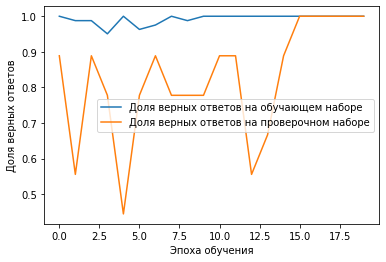

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

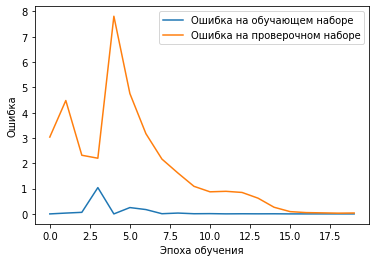

In [ ]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

## Сохраняем обученную нейронную сеть

In [ ]:
model.save("passports_Name_model.h5")

Сохраняем модель на локальный компьютер

In [ ]:
files.download("passports_Name_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>